In [2]:
import obspy
import numpy as np

In [3]:
st = obspy.read("data/20101201.014700.A.SEED")

In [4]:
print(st)

152 Trace(s) in Stream:

CN.EEO..EHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
...
(150 other traces)
...
CN.QCQ..EHZ | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [5]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

In [6]:
st[0].stats

         network: CN
         station: EEO
        location: 
         channel: EHZ
       starttime: 2010-12-01T01:47:00.000000Z
         endtime: 2010-12-01T01:52:59.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 36000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 17, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 7598080})

The letters of the channel tells us important information about the data.
## Band Code
The first letter specifies the general sampling rate and the response band of the instrument. 

|Band code | Band type | Sample rate (Hz) | Corner period (sec)|
|----------|-----------|------------------|--------------------|
| F        | ...       | ≥ 1000 to < 5000 | ≥ 10 sec           |
| G        | ...       | ≥ 1000 to < 5000 | < 10 sec           |
| D        | ...       | ≥ 250 to < 1000  | < 10 sec           |
|C | ... | ≥ 250 to < 1000 | ≥ 10 sec|
|E| Extremely Short Period| ≥ 80 to < 250| < 10 sec|
|S| Short Period| ≥ 10 to < 80 |< 10 sec|
|H| High Broad Band| ≥ 80 to < 250 |≥ 10 sec|
|B| Broad Band| ≥ 10 to < 80| ≥ 10 sec|
|M| Mid Period |> 1 to < 10||
|L| Long Period| ≈ 1| |
|V| Very Long Period |≈ 0.1||
|U| Ultra Long Period| ≈ 0.01||
|R| Extremely Long Period |≥ 0.0001 to < 0.001||
|P| On the order of 0.1 to 1 day| ≥ 0.00001 to < 0.0001||
|T| On the order of 1 to 10 days| ≥ 0.000001 to < 0.00001||
|Q| Greater than 10 days1 |< 0.000001||
|A| Administrative Instrument Channel| variable| NA|
|O| Opaque Instrument Channel |variable |NA|

## Instrument Code and Orientation Code
The second letter specifies the family to which the sensor belongs. In essence, this identifies what is being measured.

The third letter in the channel name is the Orientation Code, which provides a way to indicate the directionality of the sensor measurement. This code is sometimes used for a purpose other than direction, which is instrument-specific. When orthogonal directions are used, there are traditional orientations of North (N), East (E), and Vertical (Z), as well as other orientations that can readily be converted to traditional ones. These options are detailed with each instrument type. Use N or E for the orientation when it is within 5 degrees of north or east. Use 1 or 2 when orientations are more than 5 degrees from north or east. Put the actual orientation of the sensor in the dip and azimuth fields of blockette 52. 

In [7]:
channel = np.array([(i,st[i].stats['channel']) for i in range(len(st))])
E_band = []
H_band = []
B_band = []
for i in range(len(channel)):
    if channel[i,1][0] == 'E':
        E_band.append(channel[i])
    elif channel[i,1][0] == 'H':
        H_band.append(channel[i])
    elif channel[i,1][0] == 'B':
        B_band.append(channel[i])
        
print(E_band[:10])
print(H_band[:10])
print(B_band[:10])

[array(['0', 'EHZ'],
      dtype='<U21'), array(['9', 'EHZ'],
      dtype='<U21'), array(['34', 'EHZ'],
      dtype='<U21'), array(['47', 'EHZ'],
      dtype='<U21'), array(['48', 'EHZ'],
      dtype='<U21'), array(['91', 'EHZ'],
      dtype='<U21'), array(['92', 'EHZ'],
      dtype='<U21'), array(['105', 'EHZ'],
      dtype='<U21'), array(['127', 'EHZ'],
      dtype='<U21'), array(['140', 'EHZ'],
      dtype='<U21')]
[array(['1', 'HHZ'],
      dtype='<U21'), array(['2', 'HHN'],
      dtype='<U21'), array(['3', 'HHE'],
      dtype='<U21'), array(['4', 'HHZ'],
      dtype='<U21'), array(['5', 'HHN'],
      dtype='<U21'), array(['6', 'HHZ'],
      dtype='<U21'), array(['7', 'HHN'],
      dtype='<U21'), array(['8', 'HHE'],
      dtype='<U21'), array(['10', 'HHE'],
      dtype='<U21'), array(['11', 'HHZ'],
      dtype='<U21')]
[array(['19', 'BHE'],
      dtype='<U21'), array(['20', 'BHN'],
      dtype='<U21'), array(['21', 'BHZ'],
      dtype='<U21'), array(['25', 'BHN'],
      dtype='<U21

In this data, there are only 3 types of bands: E, H, B. Only 3 of them have 'D' (Barometer, measuring pressure) instrument code, while the rest has 'H' (High Gain Seismometer). We will separate each band (except E_band since they're all EHZ) into separate instrument/orientation code.

In [8]:
HDF = []
HHN = []
HHE = []
HHZ = []
for i in range(len(H_band)):
    if H_band[i][1][1] == 'D':
        HDF.append(H_band[i])
    elif H_band[i][1][2] == "N":
        HHN.append(H_band[i])
    elif H_band[i][1][2] == "E":
        HHE.append(H_band[i])    
    elif H_band[i][1][2] == "Z":
        HHZ.append(H_band[i])

BHN = []
BHE = []
BHZ = []
for i in range(len(B_band)):
    if B_band[i][1][2] == "N":
        BHN.append(B_band[i])
    elif B_band[i][1][2] == "E":
        BHE.append(B_band[i])    
    elif B_band[i][1][2] == "Z":
        BHZ.append(B_band[i])
        
print(HDF)
print(HHN[:5])
print(HHE[:5])
print(HHZ[:5])
print(BHN[:5])
print(BHE[:5])
print(BHZ[:5])

[array(['115', 'HDF'],
      dtype='<U21'), array(['116', 'HDF'],
      dtype='<U21'), array(['117', 'HDF'],
      dtype='<U21')]
[array(['2', 'HHN'],
      dtype='<U21'), array(['5', 'HHN'],
      dtype='<U21'), array(['7', 'HHN'],
      dtype='<U21'), array(['12', 'HHN'],
      dtype='<U21'), array(['14', 'HHN'],
      dtype='<U21')]
[array(['3', 'HHE'],
      dtype='<U21'), array(['8', 'HHE'],
      dtype='<U21'), array(['10', 'HHE'],
      dtype='<U21'), array(['13', 'HHE'],
      dtype='<U21'), array(['17', 'HHE'],
      dtype='<U21')]
[array(['1', 'HHZ'],
      dtype='<U21'), array(['4', 'HHZ'],
      dtype='<U21'), array(['6', 'HHZ'],
      dtype='<U21'), array(['11', 'HHZ'],
      dtype='<U21'), array(['15', 'HHZ'],
      dtype='<U21')]
[array(['20', 'BHN'],
      dtype='<U21'), array(['25', 'BHN'],
      dtype='<U21'), array(['49', 'BHN'],
      dtype='<U21'), array(['77', 'BHN'],
      dtype='<U21'), array(['111', 'BHN'],
      dtype='<U21')]
[array(['19', 'BHE'],
      dtype

## EHZ Plot

<IPython.core.display.Javascript object>


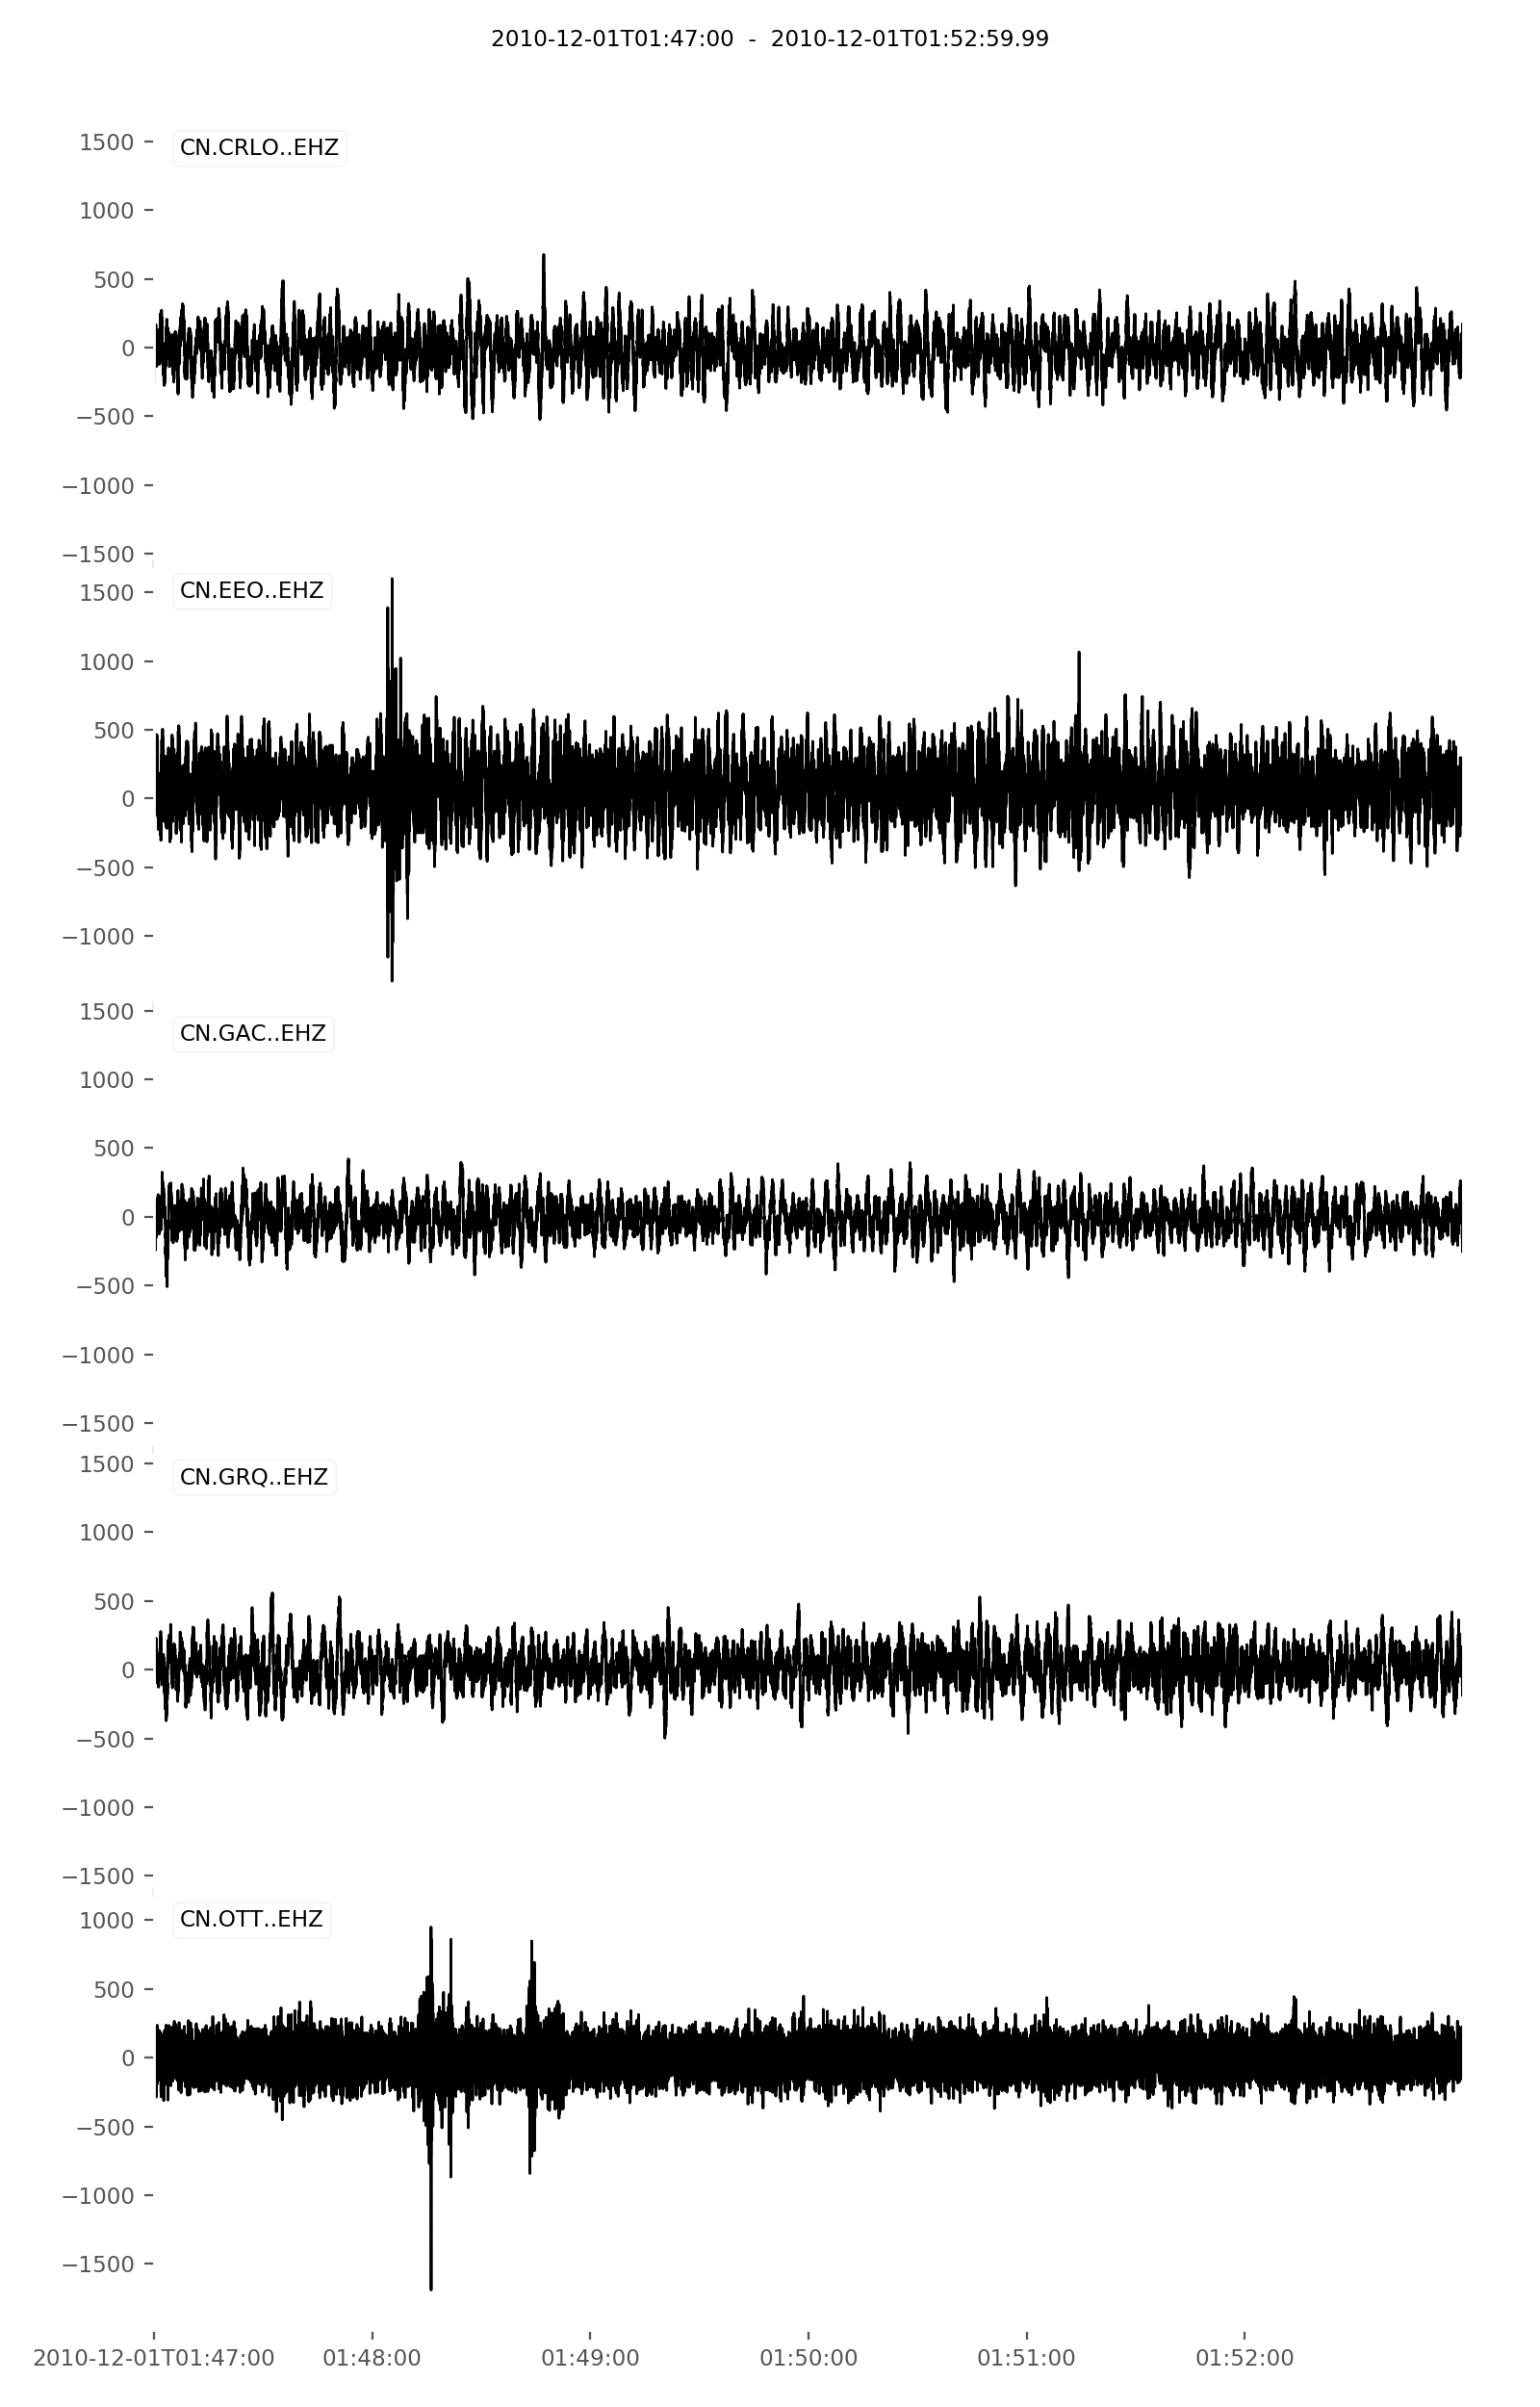

In [9]:
EHZ_st = obspy.core.stream.Stream()
for c in E_band:
    EHZ_st.append(st[int(c[0])])
EHZ_st[:5].plot()

<IPython.core.display.Javascript object>


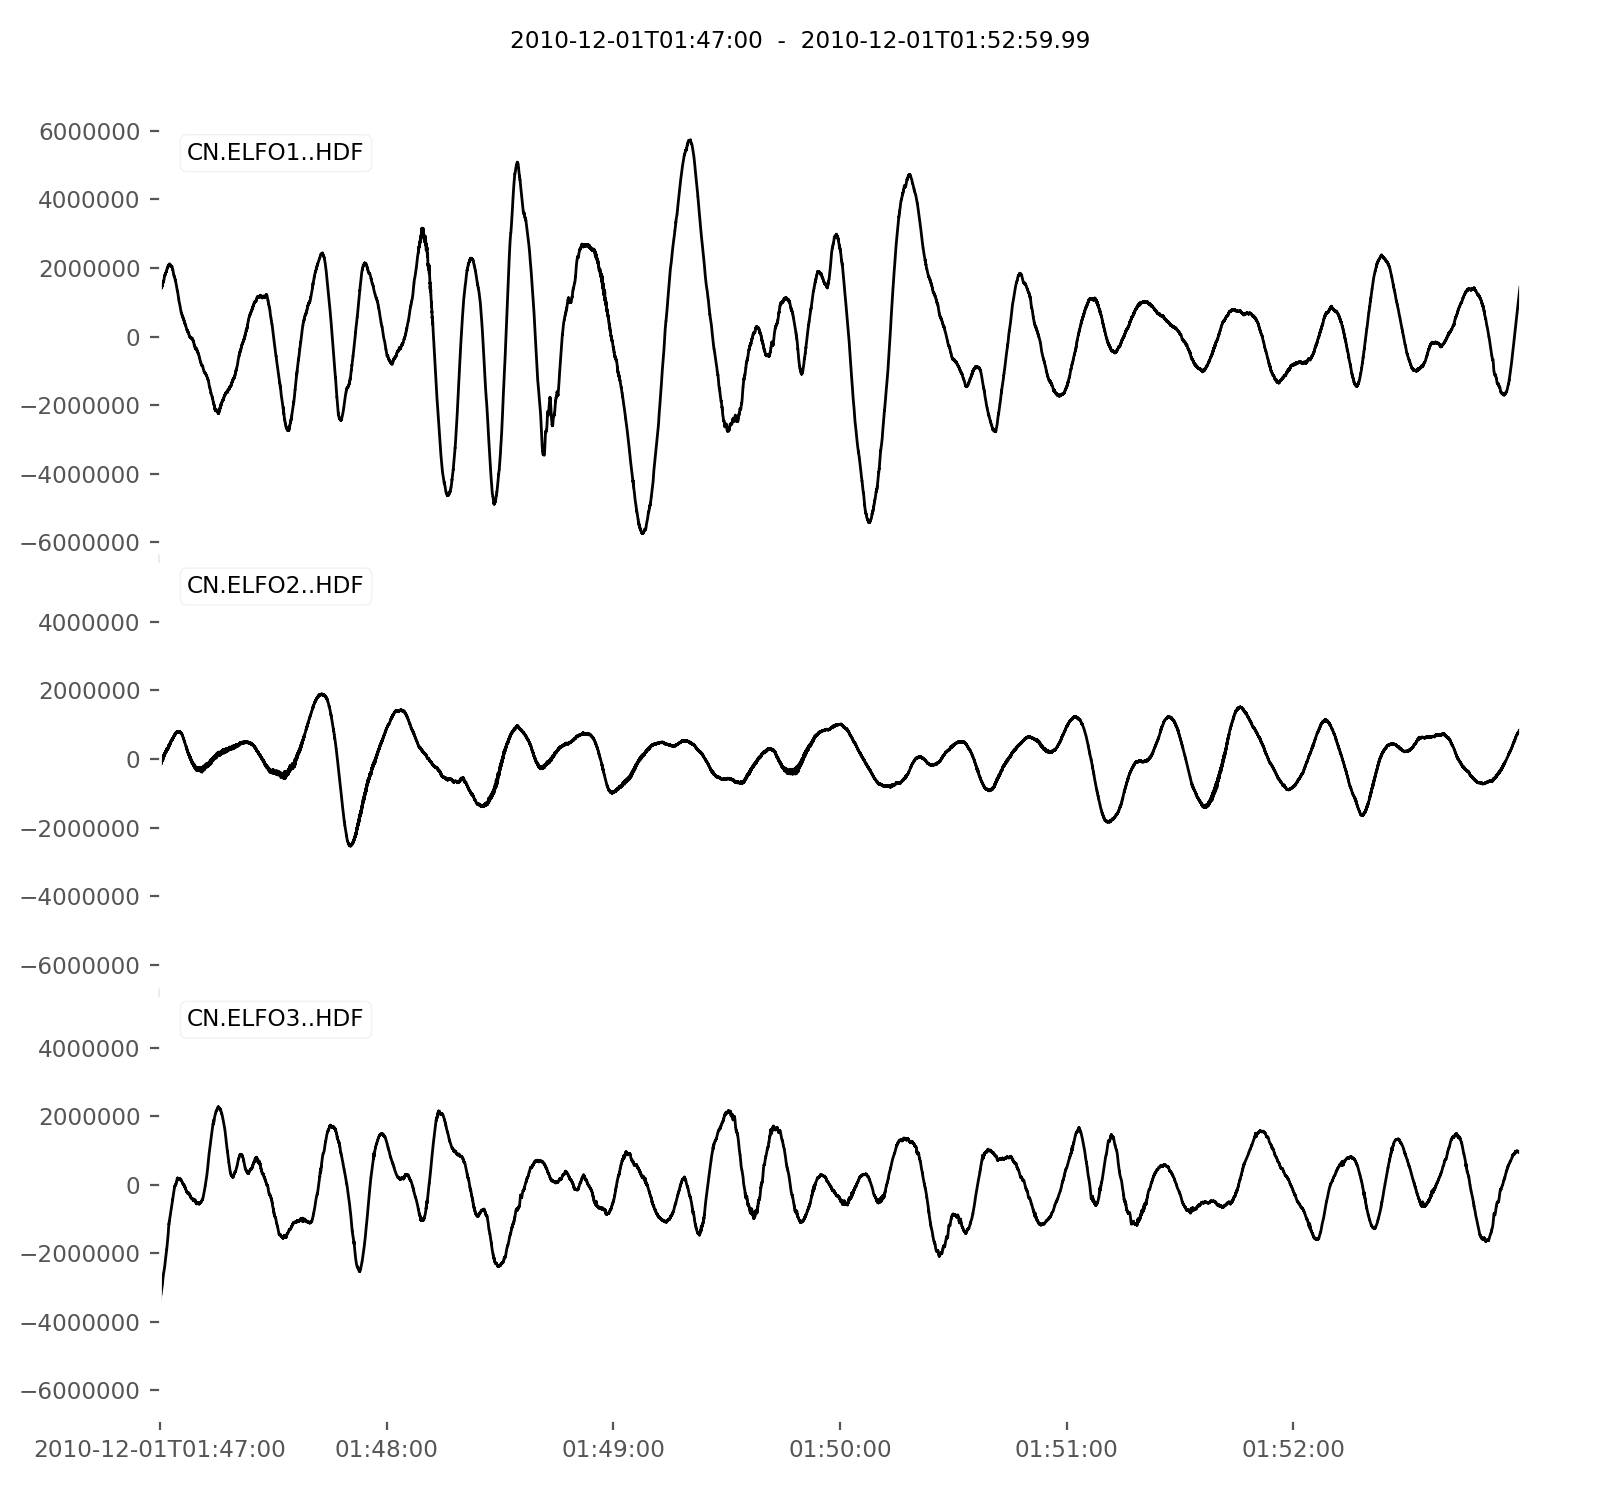

In [10]:
HDF_st = obspy.core.stream.Stream()
for c in HDF:
    HDF_st.append(st[int(c[0])])
HDF_st.plot()

<IPython.core.display.Javascript object>


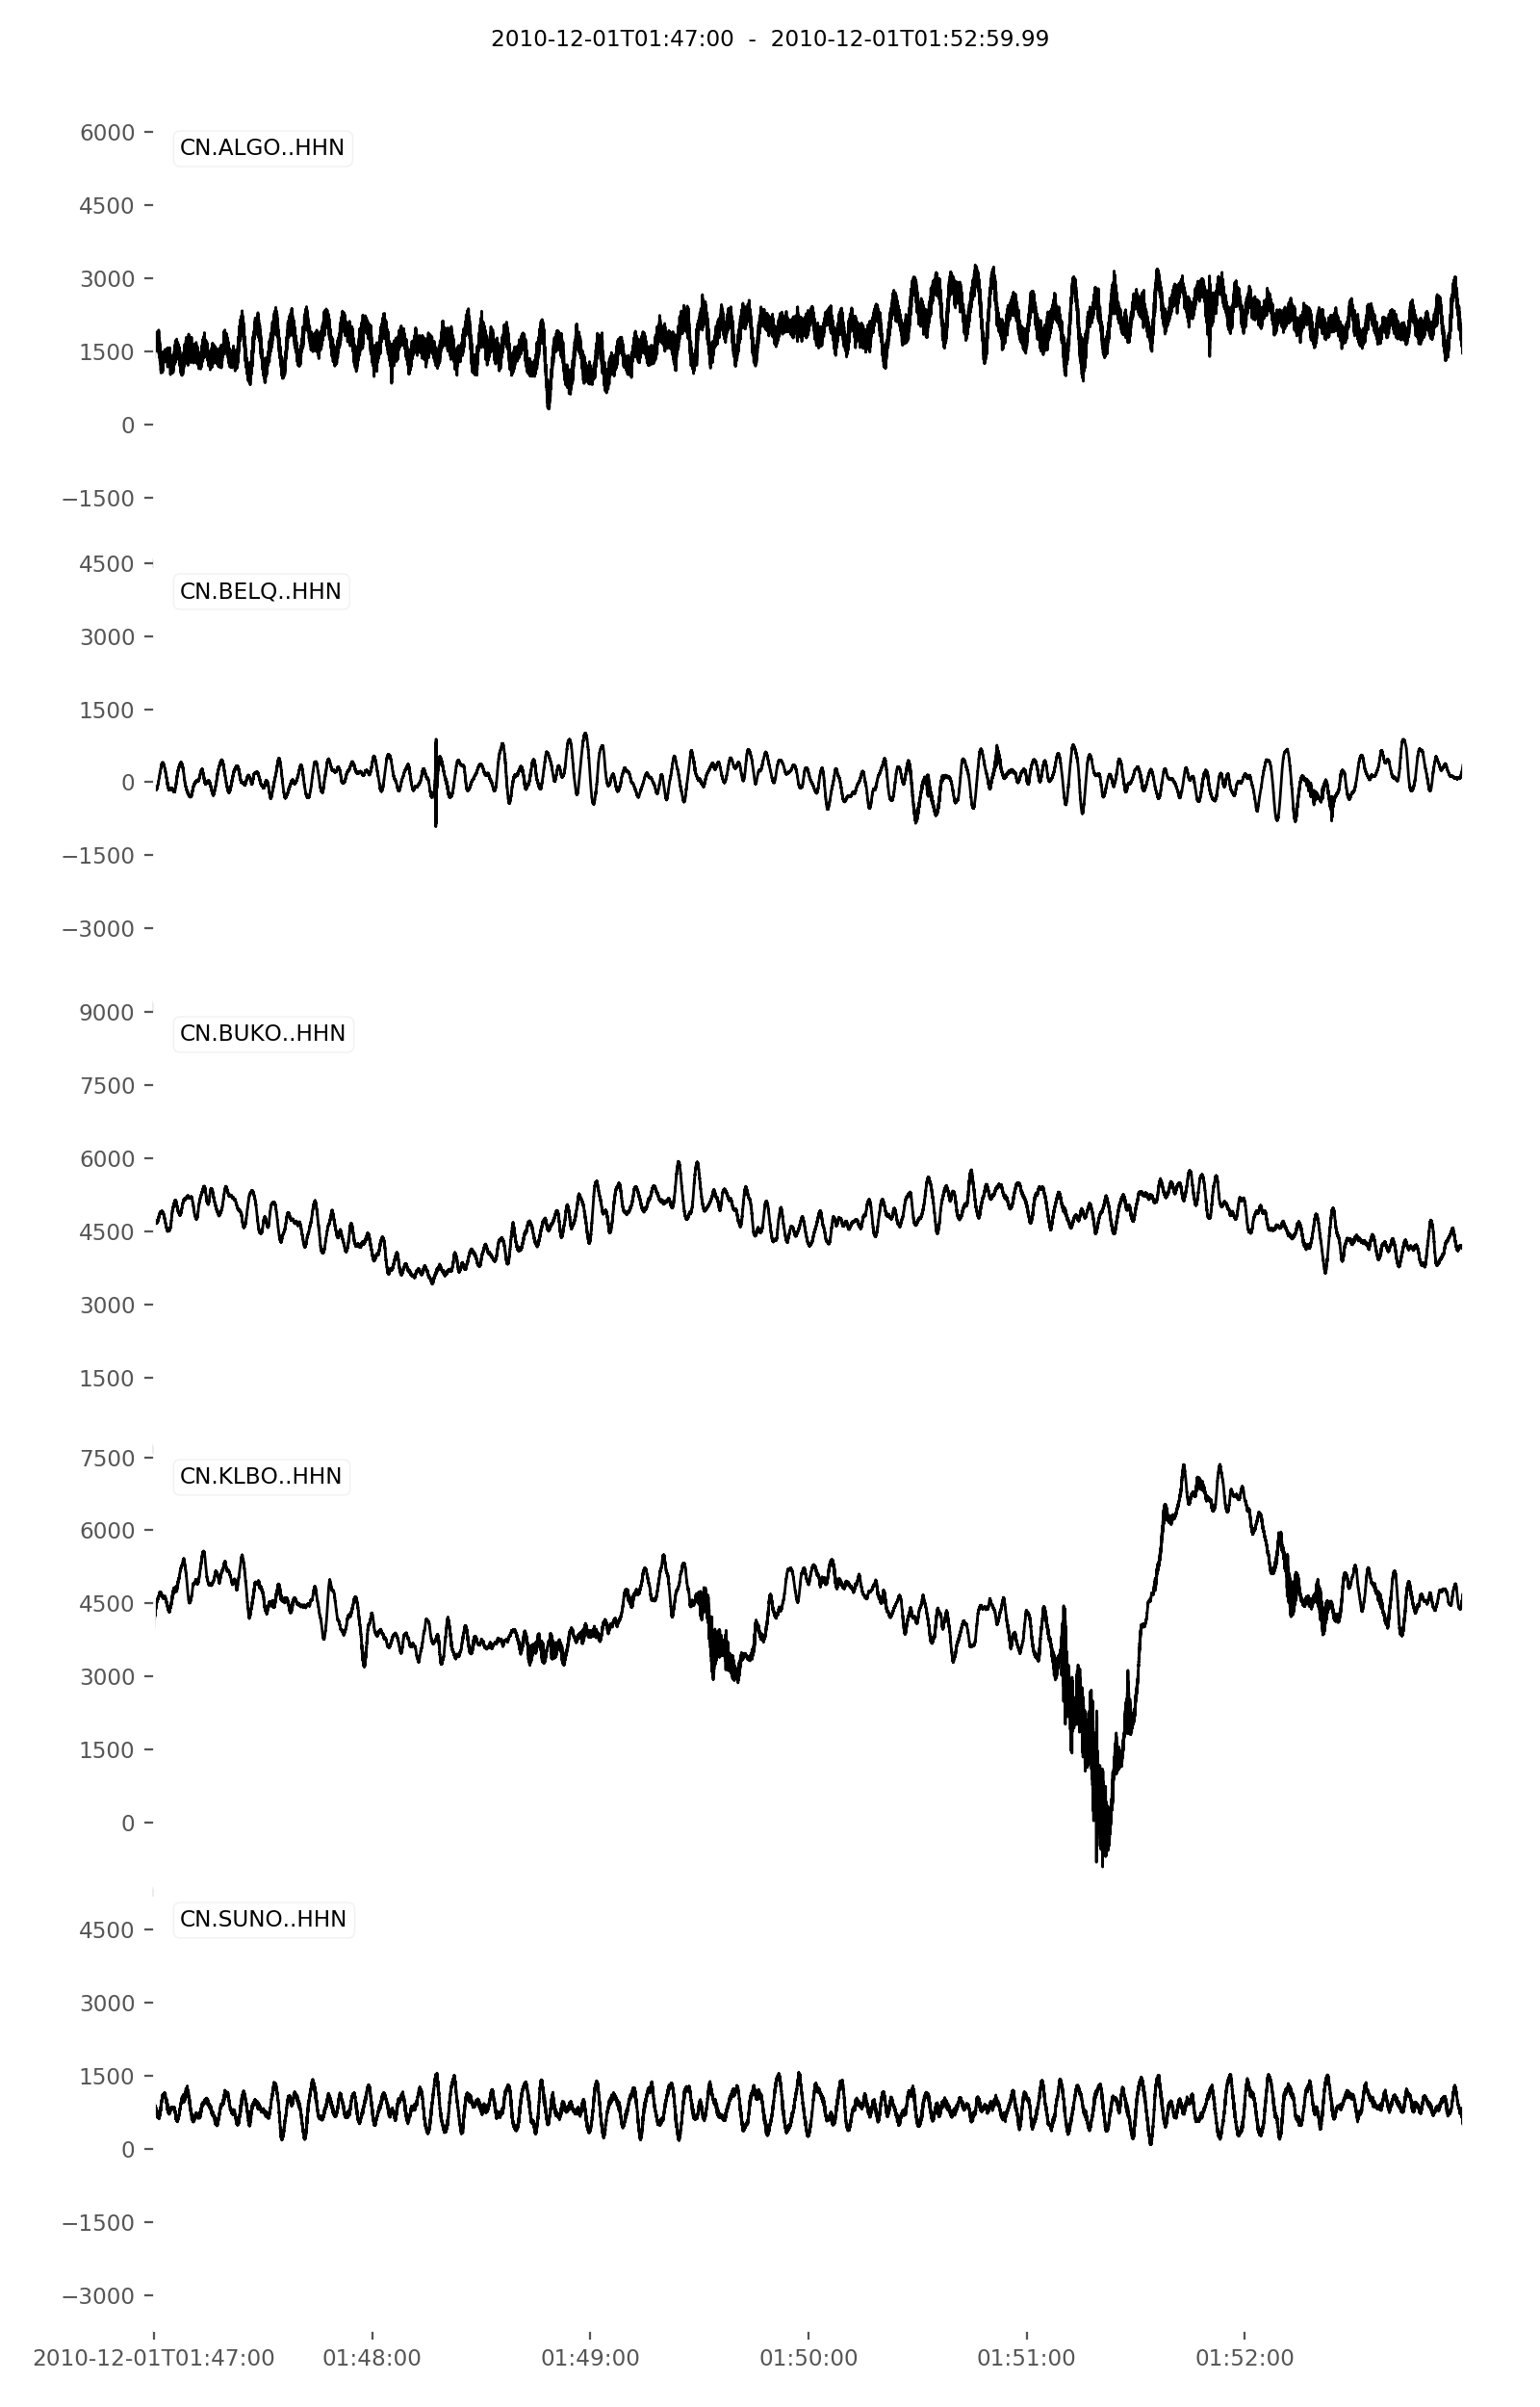

In [11]:
HHN_st = obspy.core.stream.Stream()
for c in HHN:
    HHN_st.append(st[int(c[0])])
HHN_st[:5].plot()

<IPython.core.display.Javascript object>


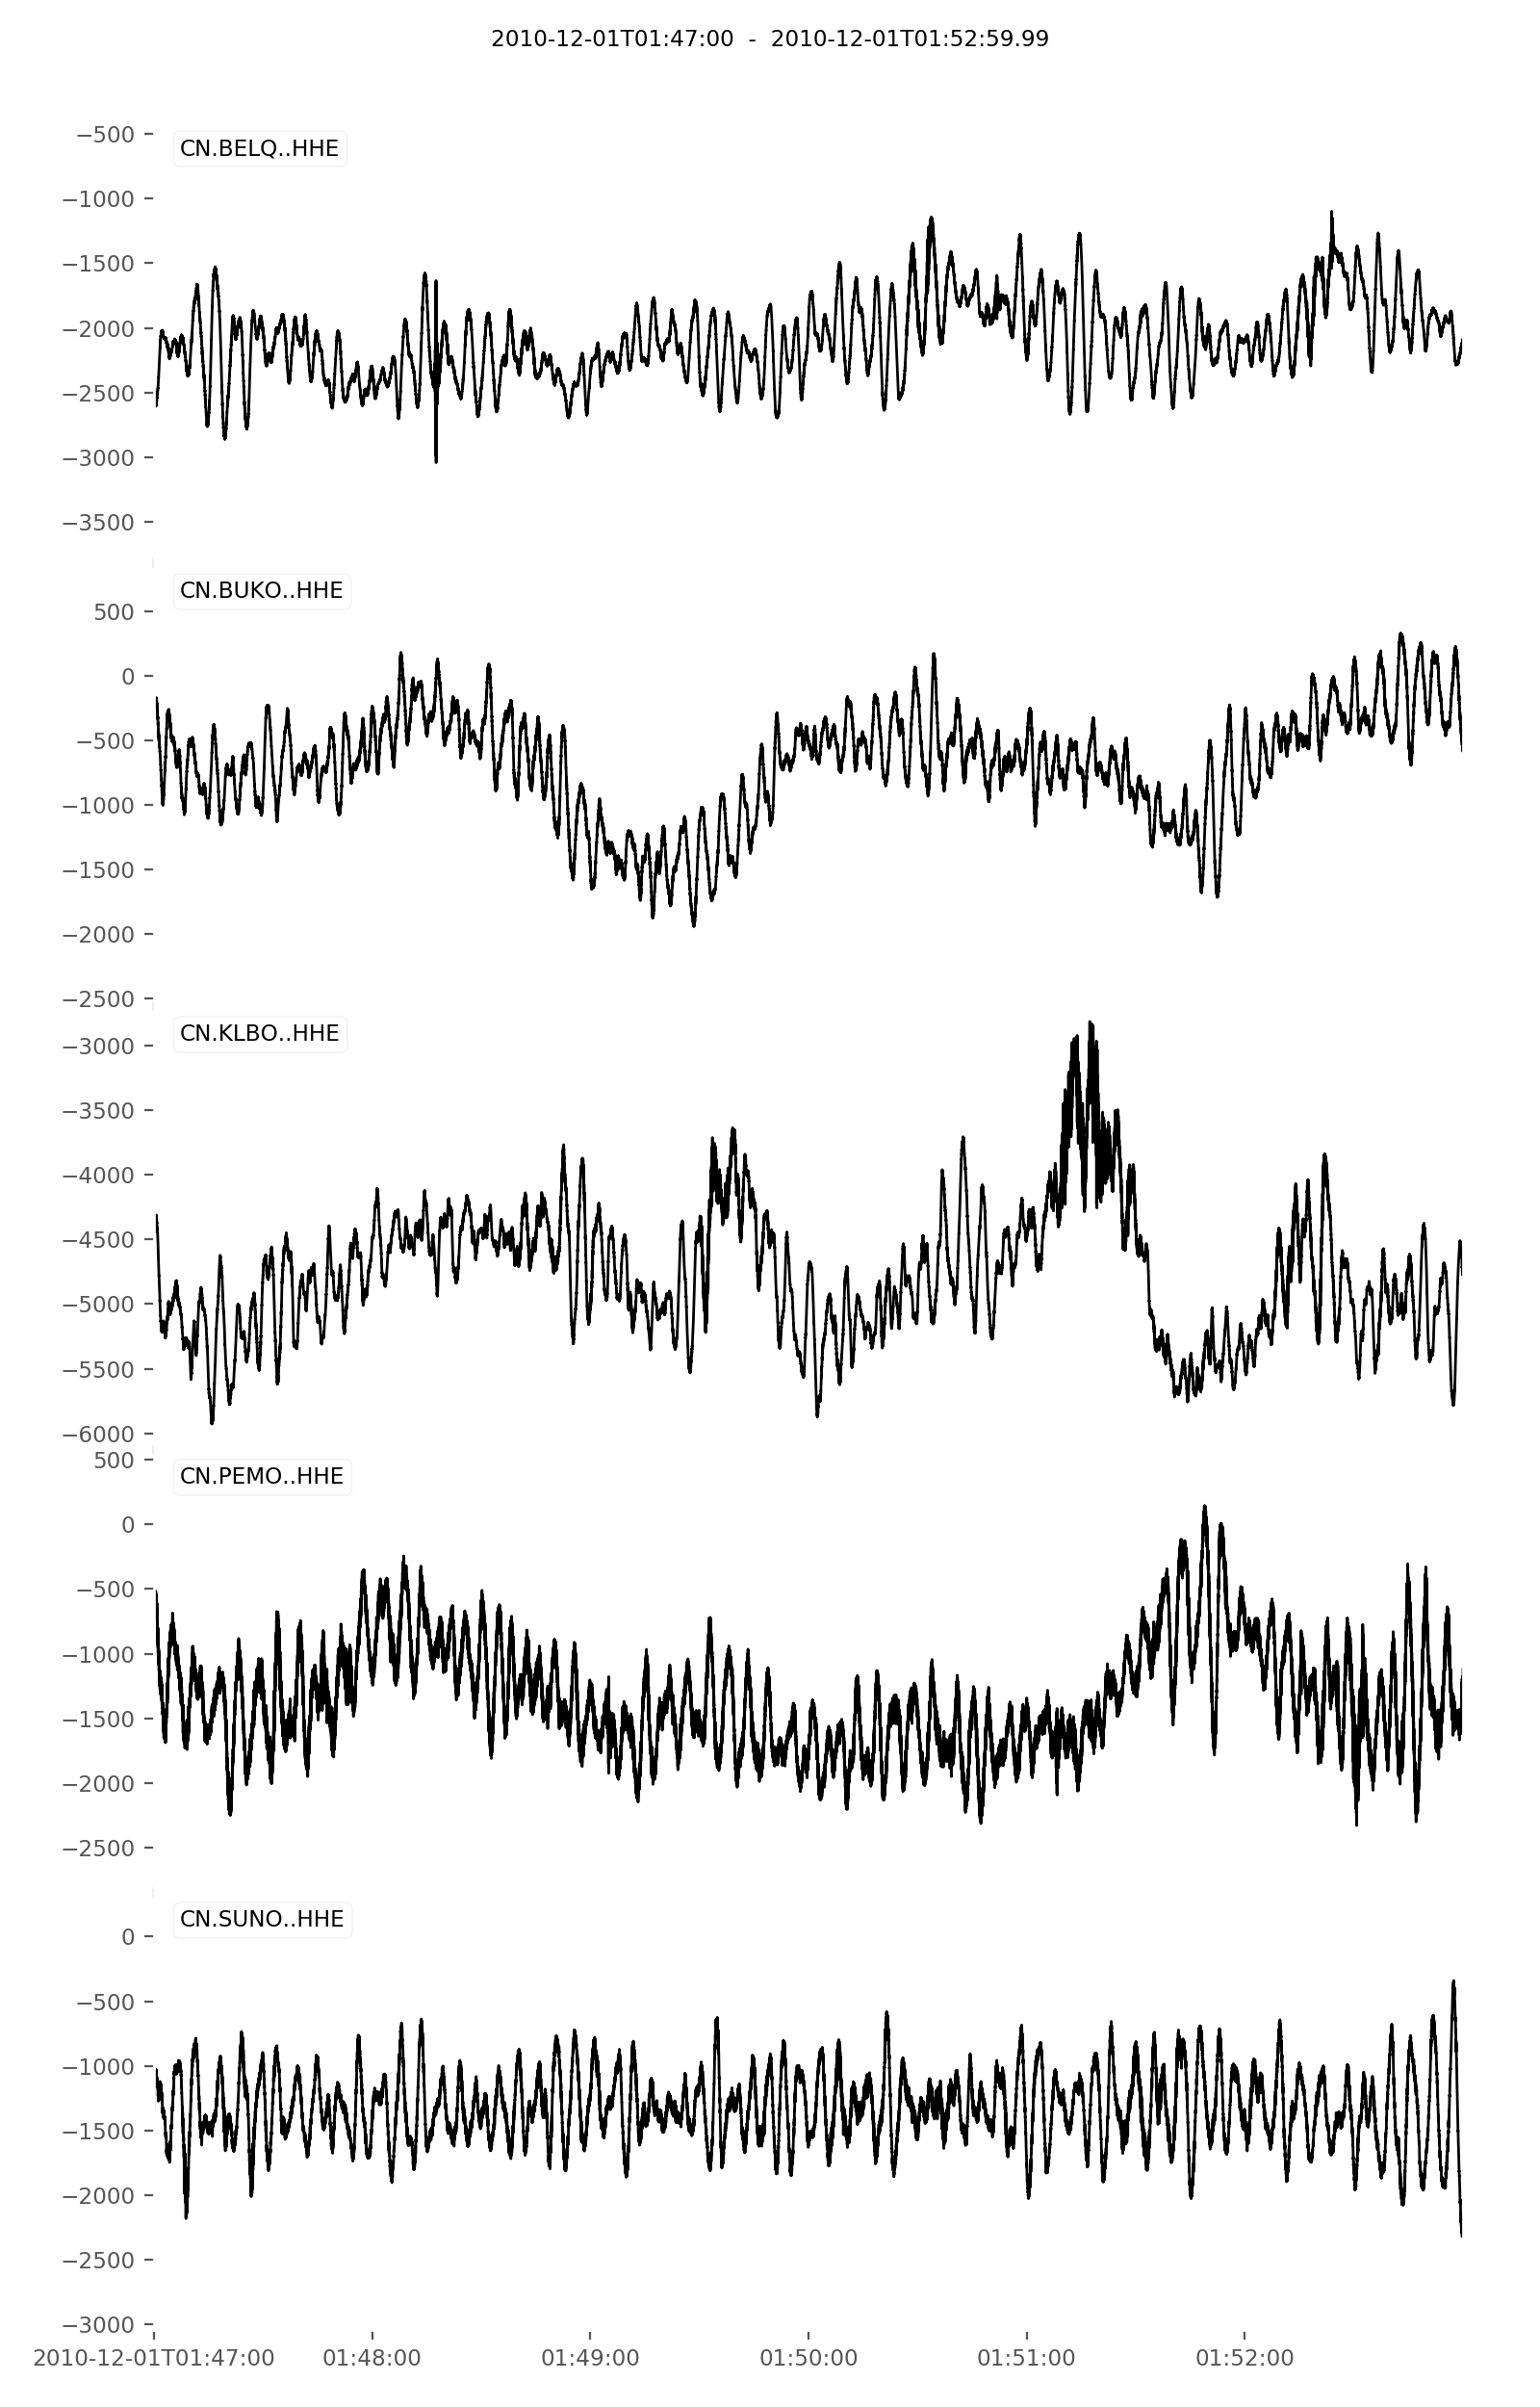

In [12]:
HHE_st = obspy.core.stream.Stream()
for c in HHE:
    HHE_st.append(st[int(c[0])])
HHE_st[:5].plot()

<IPython.core.display.Javascript object>


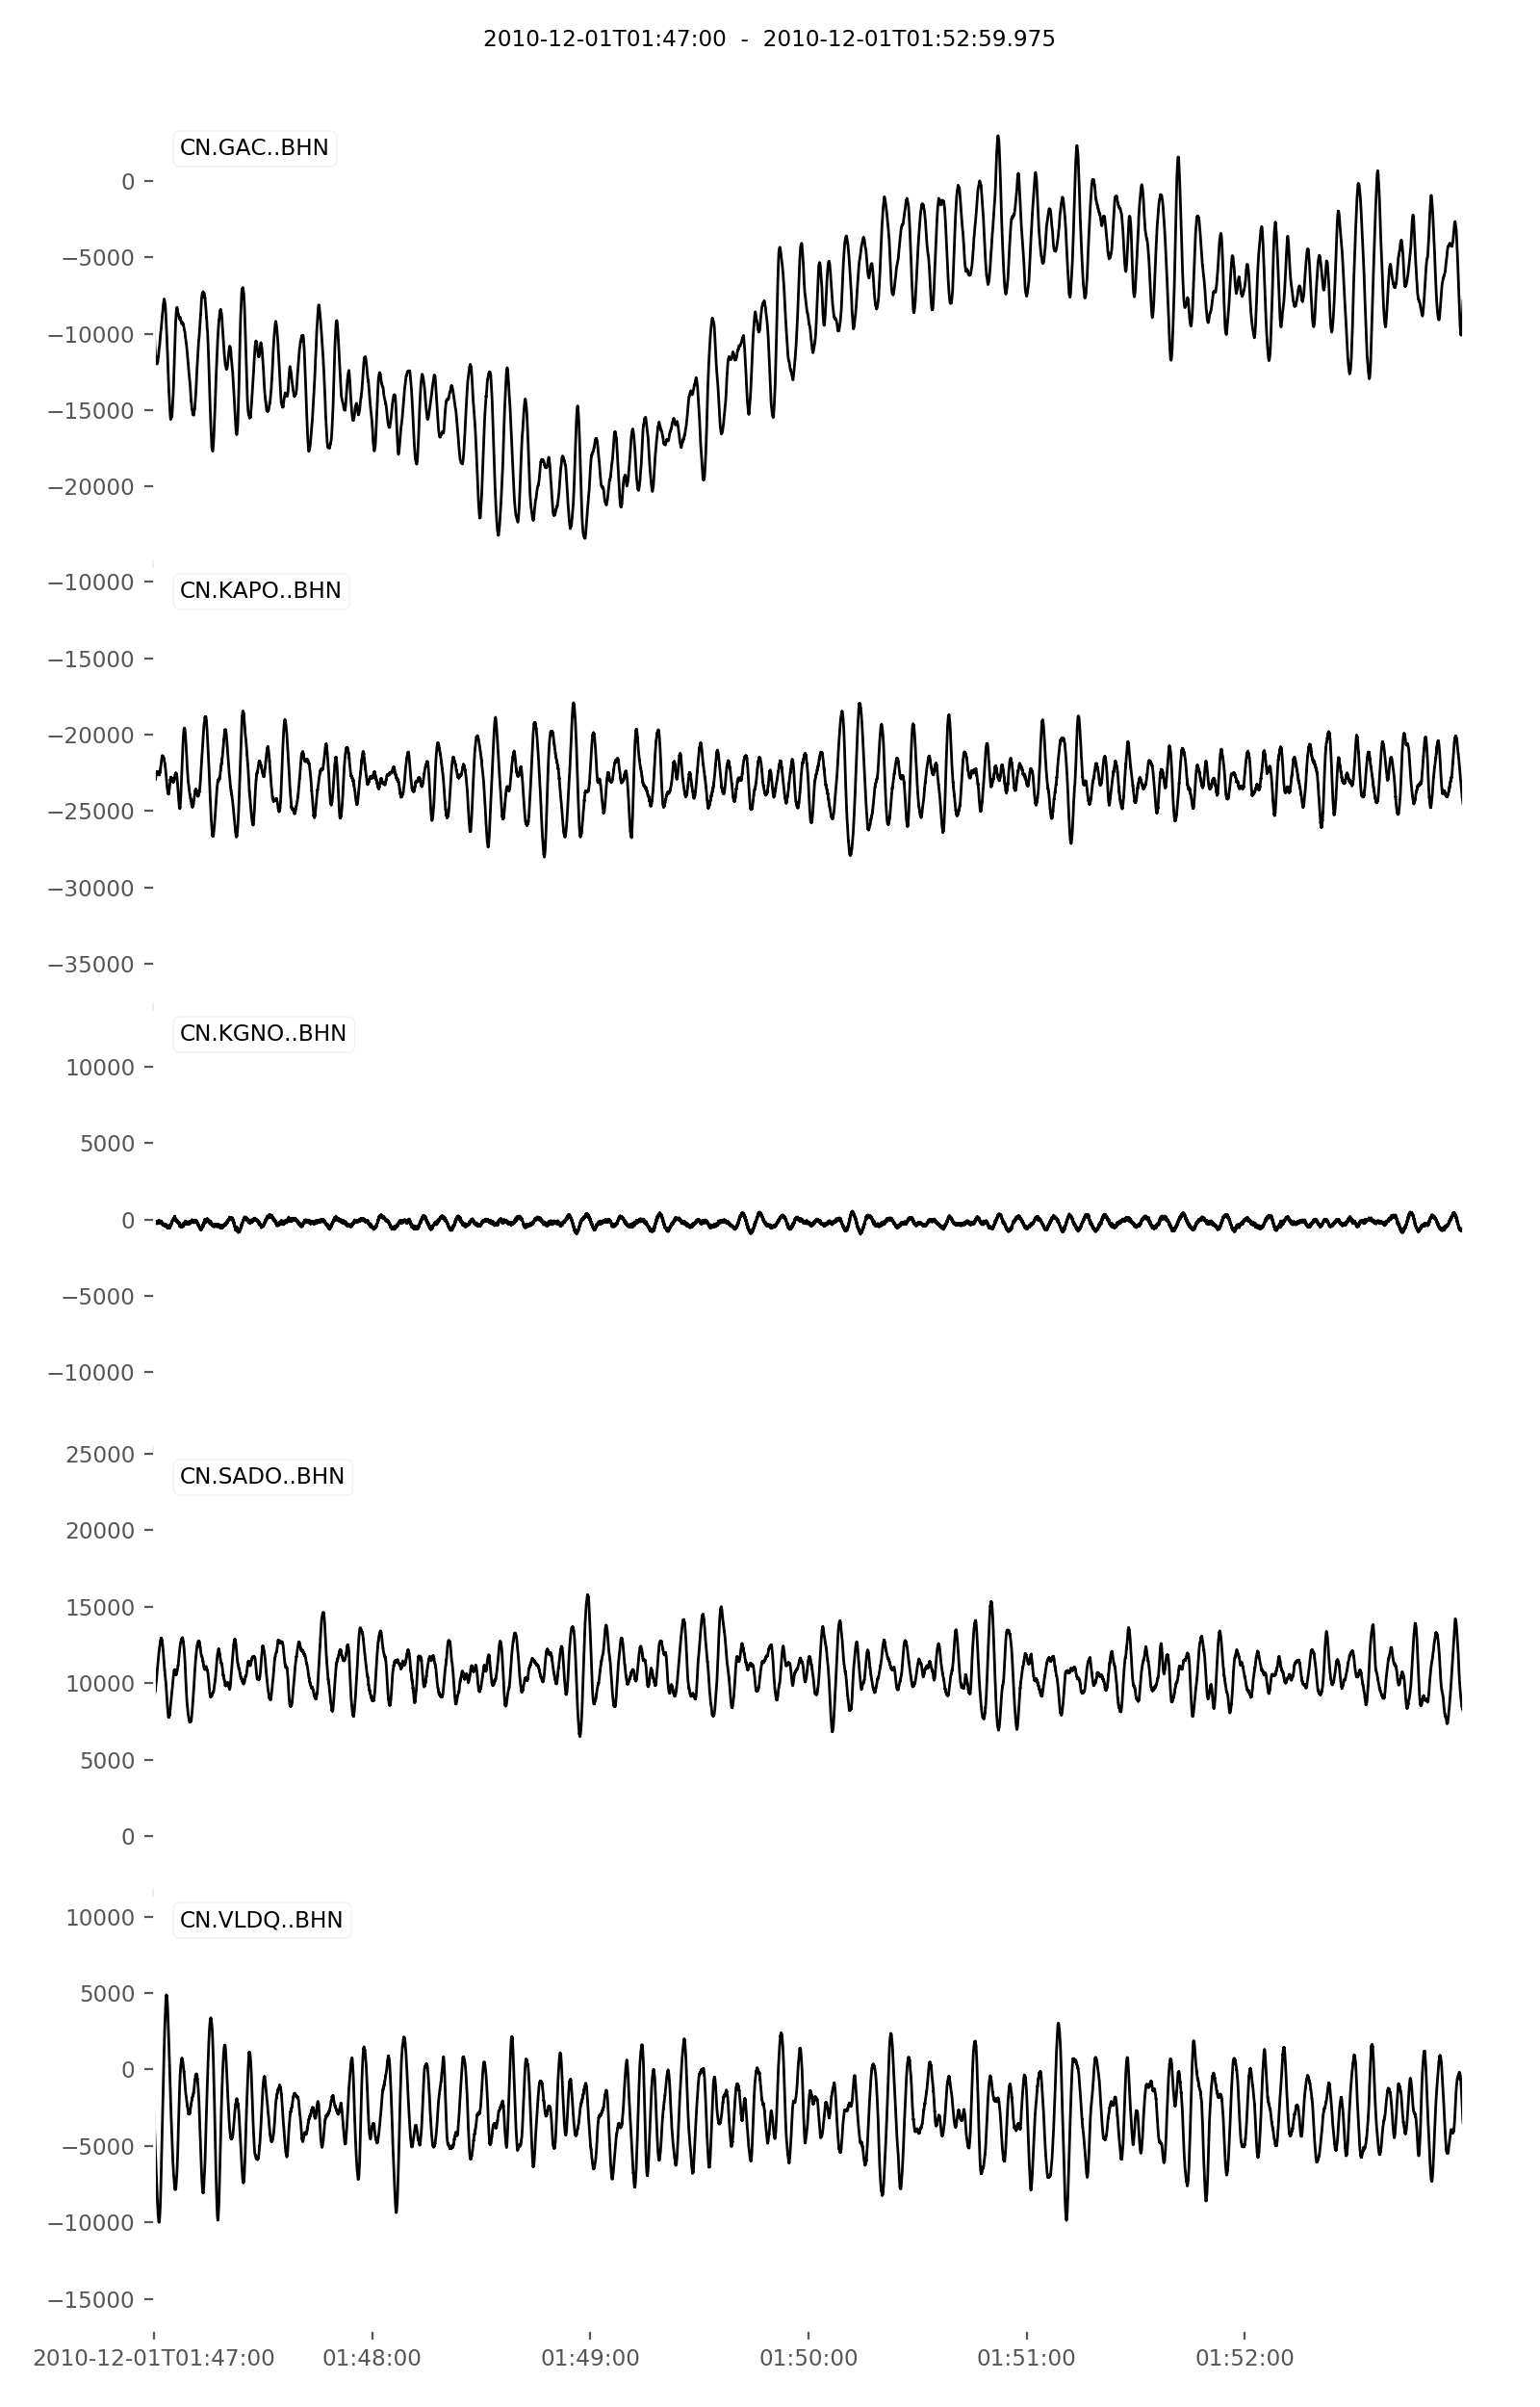

In [13]:
BHN_st = obspy.core.stream.Stream()
for c in BHN:
    BHN_st.append(st[int(c[0])])
BHN_st[:5].plot()

<IPython.core.display.Javascript object>


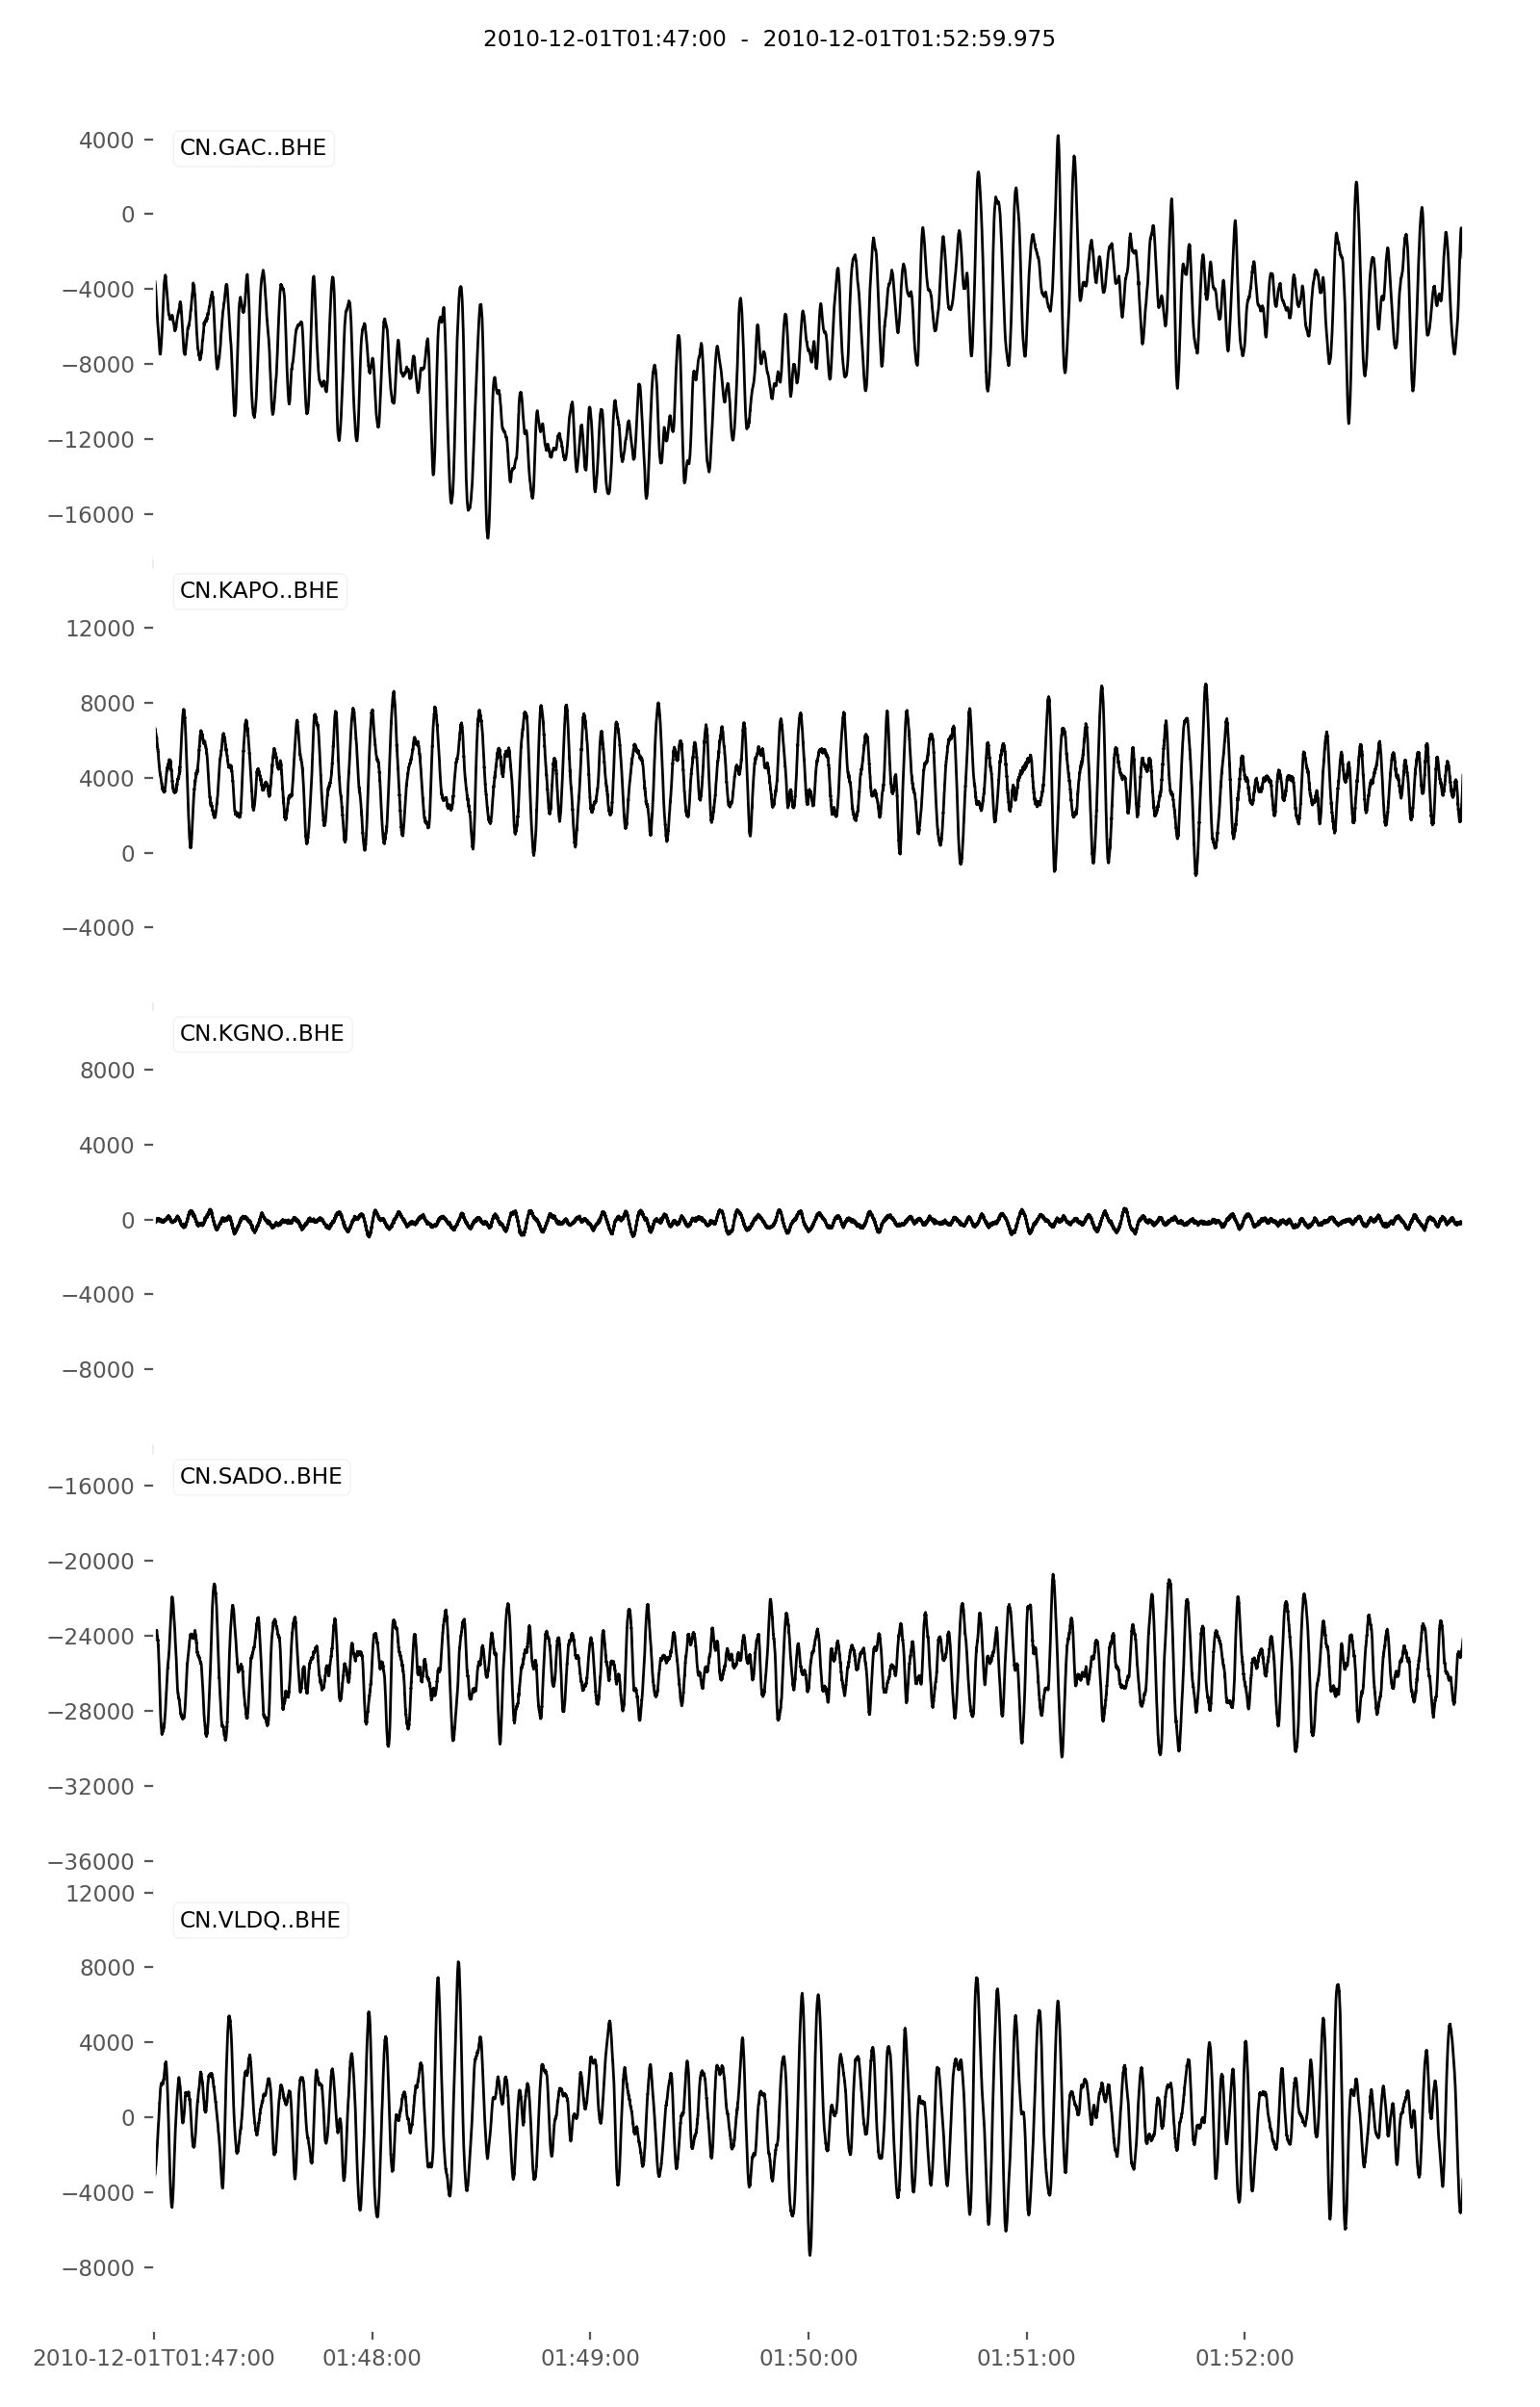

In [14]:
BHE_st = obspy.core.stream.Stream()
for c in BHE:
    BHE_st.append(st[int(c[0])])
BHE_st[:5].plot()

<IPython.core.display.Javascript object>


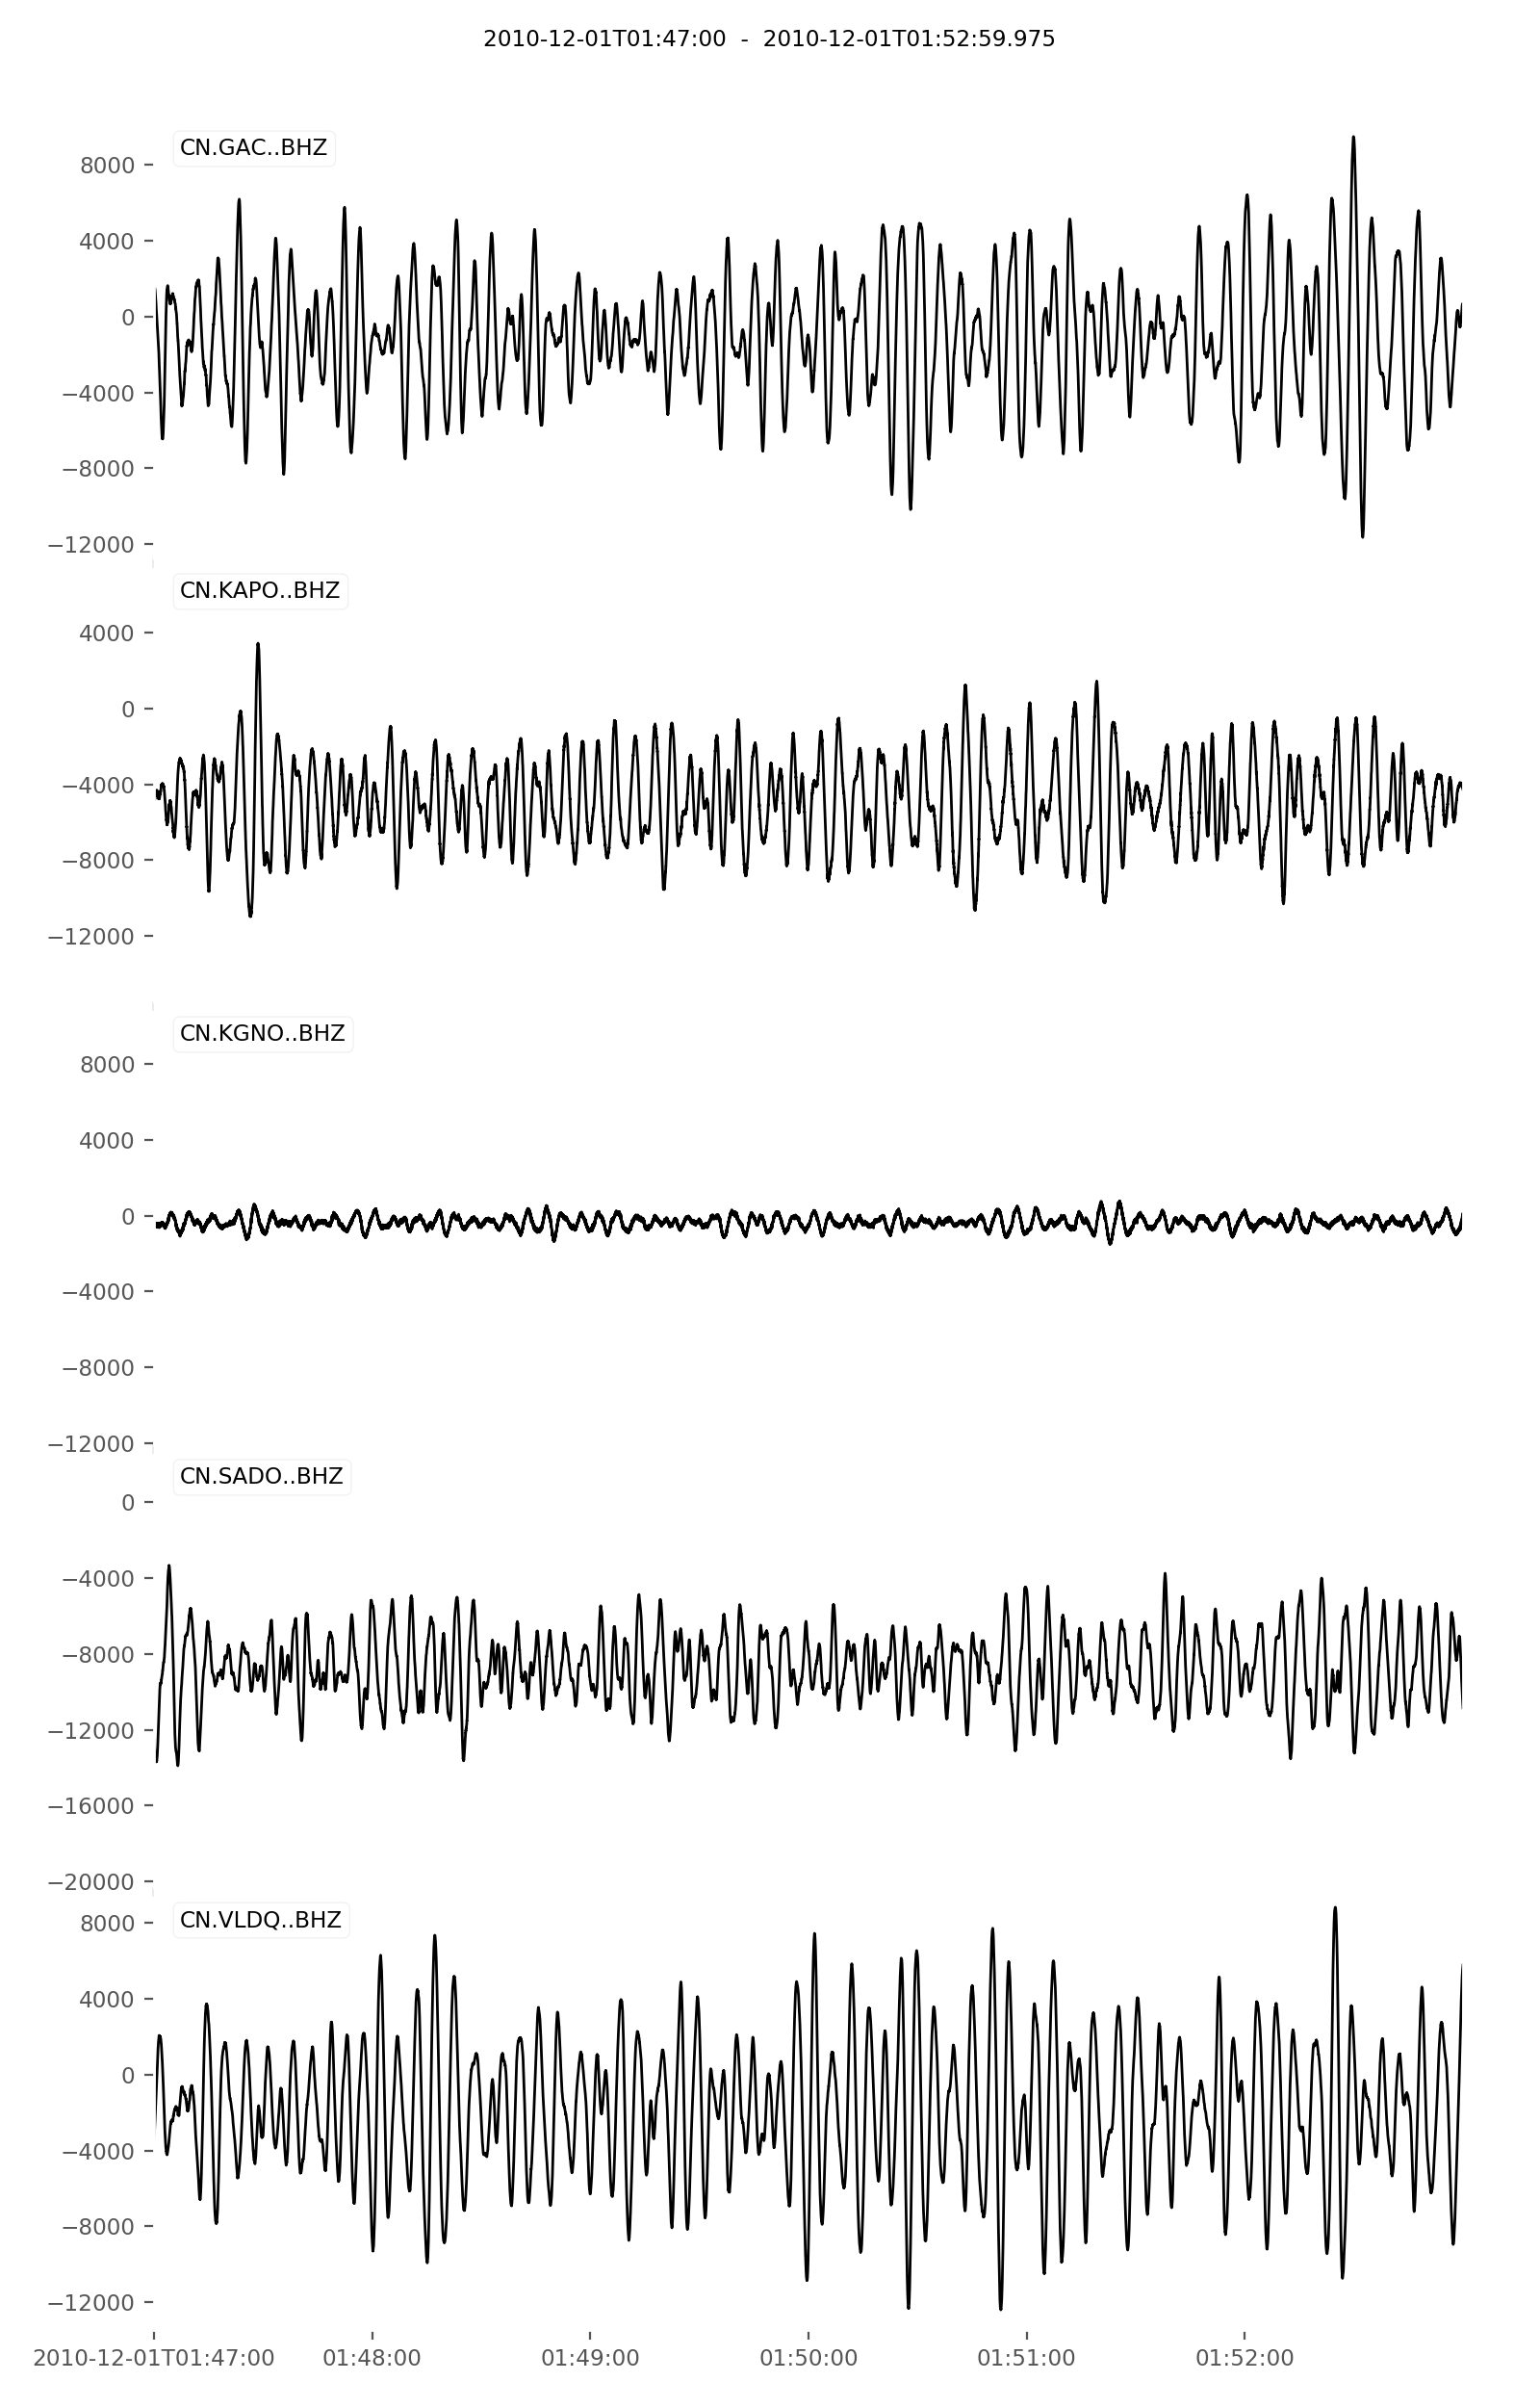

In [15]:
BHZ_st = obspy.core.stream.Stream()
for c in BHZ:
    BHZ_st.append(st[int(c[0])])
BHZ_st[:5].plot()

In [16]:
st[0].data.shape

(36000,)

In [17]:
st[0].data

array([ 54,  99, 157, ...,  27, 266, 202], dtype=int32)

In [18]:
st[1].data

array([-2824, -2819, -2825, ..., -2376, -2382, -2398], dtype=int32)

In [19]:
st[0].times()

array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
         3.59970000e+02,   3.59980000e+02,   3.59990000e+02])

In [20]:
st[1].differentiate().data

array([  500.,   -50.,   550., ...,  -550., -1100., -1600.])